<a href="https://colab.research.google.com/github/AlexandreOrmandes/Ex_12/blob/main/mod12_ex02_transforma%C3%A7%C3%B5es_em_X_e_Y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.formula.api as smf

# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [6]:
#Este script tem como objetivo analisar a relação entre o percentual de gorjetas e o valor líquido da conta em um conjunto de dados de gorjetas.


In [7]:
# Carregando o conjunto de dados de gorjetas
tips = sns.load_dataset("tips")

# Criando a variável 'tip_pct' que é o percentual da gorjeta em relação ao valor líquido da conta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Criando a variável 'net_bill' que é o valor total da conta menos a gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Ajustando o modelo de regressão linear para 'tip_pct' explicado por 'net_bill'
reg_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Exibindo o sumário do modelo
print(reg_pct.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.52e-06
Time:                        12:02:11   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

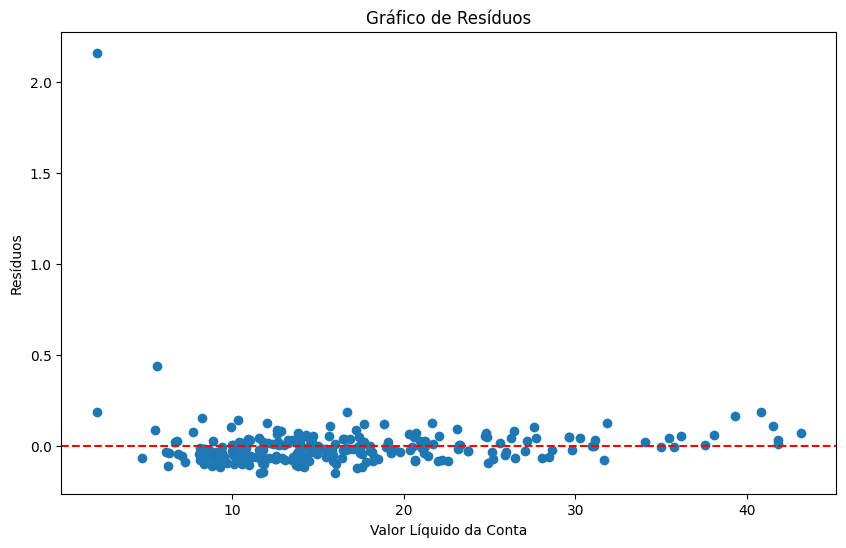

In [8]:
def plotar_residuos(modelo, dados, var_x):
    # """Plota os resíduos de um modelo de regressão."""
    residuos = modelo.resid
    plt.figure(figsize=(10, 6))
    plt.scatter(dados[var_x], residuos)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valor Líquido da Conta')
    plt.ylabel('Resíduos')
    plt.title('Gráfico de Resíduos')
    plt.show()

# Utilizando a função
plotar_residuos(reg_pct, tips, 'net_bill')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [10]:
# Criando a variável 'log_net_bill', que é o logaritmo natural do 'net_bill'
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustando um modelo de regressão linear onde 'tip_pct' é a variável dependente e 'log_net_bill' é a variável independente
reg_log = smf.ols('tip_pct ~ log_net_bill', data=tips).fit()

# Exibindo o sumário do modelo
print(reg_log.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.62e-13
Time:                        12:05:51   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444   

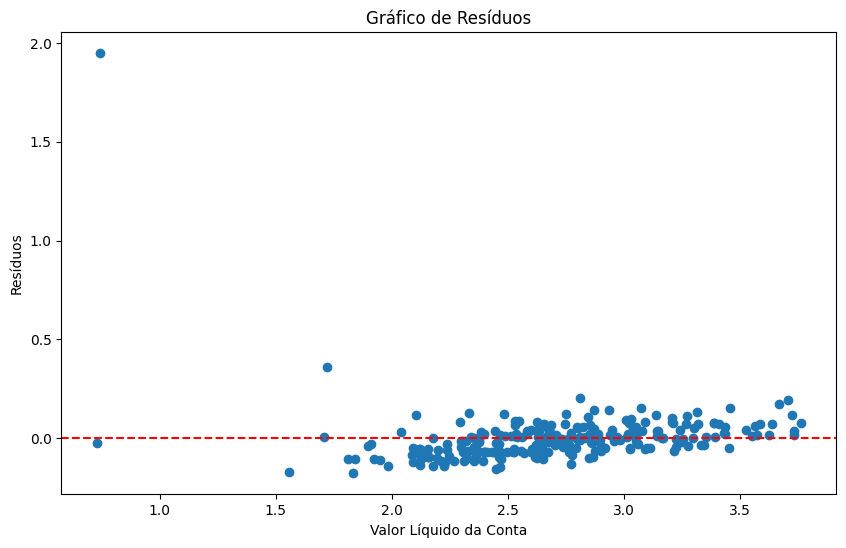

In [11]:
# Utilizando a função
plotar_residuos(reg_log, tips, 'log_net_bill')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [12]:
# Criando a variável 'net_bill_squared', que é o quadrado de 'net_bill'
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustando um modelo de regressão polinomial de segundo grau para 'tip_pct' usando 'net_bill' e 'net_bill_squared'
reg_poly = smf.ols('tip_pct ~ net_bill + net_bill_squared', data=tips).fit()

# Exibindo o sumário do modelo
print(reg_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.06e-09
Time:                        12:08:21   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047  

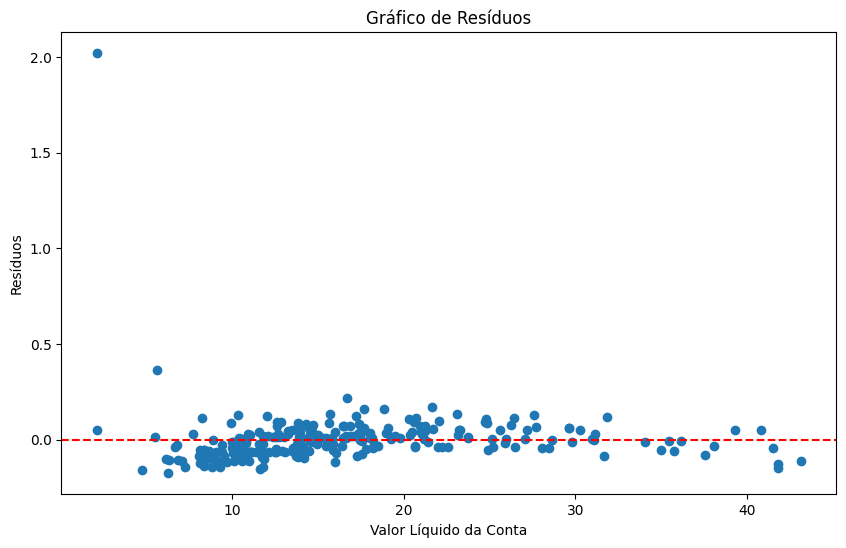

In [13]:
# Utilizando a função para plotar os resíduos do modelo polinomial
plotar_residuos(reg_poly, tips, 'net_bill')





###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [15]:
# Criando a variável 'log_tip_pct', que é o logaritmo natural do percentual de gorjeta ('tip_pct')
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Ajustando um modelo de regressão linear onde 'log_tip_pct' é a variável dependente e 'net_bill' é a variável independente
reg_log = smf.ols('log_tip_pct ~ net_bill', data=tips).fit()

# Exibindo o sumário do modelo
print(reg_log.summary())

# Calculando o R-quadrado para 'log_tip_pct' usando o atributo rsquared do modelo ajustado
r2_log_tip_pct = reg_log.rsquared
print(f'R-quadrado para o modelo com log(tip_pct): {r2_log_tip_pct}')

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           8.27e-16
Time:                        12:11:36   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

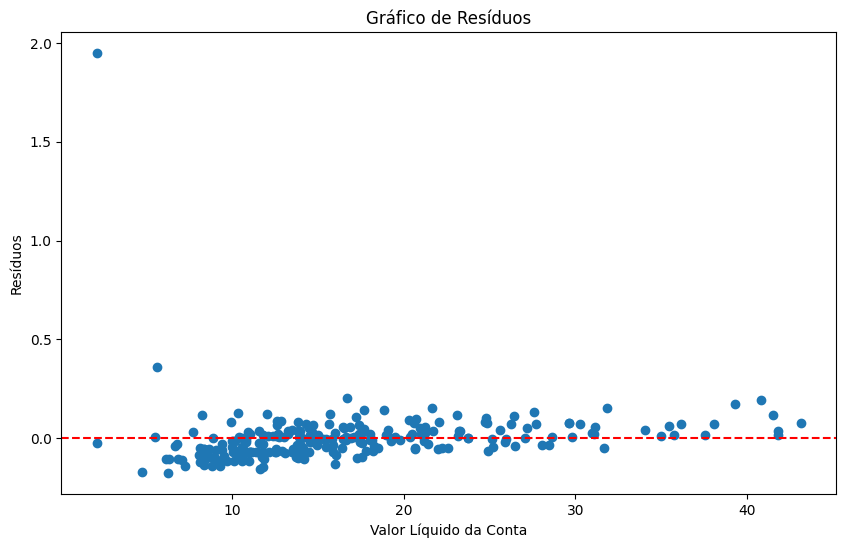

In [14]:
# Utilizando a função para plotar os resíduos do modelo com log(tip_pct)
plotar_residuos(reg_log, tips, 'net_bill')


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [17]:
# Ajustando um modelo de regressão linear onde tanto 'tip_pct' quanto 'net_bill' estão em escala logarítmica
reg_log_log = smf.ols('log_tip_pct ~ log_net_bill', data=tips).fit()

# Exibindo o sumário do modelo
print(reg_log_log.summary())

# Calculando o R-quadrado para o modelo que usa log(tip_pct) e log(net_bill)
r2_log_log_tip_pct = reg_log_log.rsquared
print(f'R-quadrado para o modelo com log(tip_pct) e log(net_bill): {r2_log_log_tip_pct}')


                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           5.20e-20
Time:                        12:13:20   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

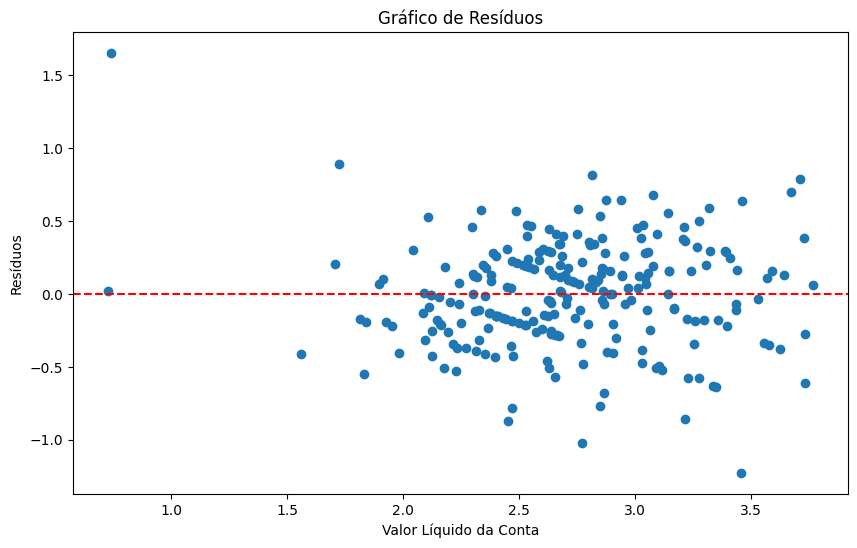

In [18]:
# Utilizando a função para plotar os resíduos do modelo com log(tip_pct) e log(net_bill)
plotar_residuos(reg_log_log, tips, 'log_net_bill')



###  6. qual modelo resultou no melhor ajuste?

In [19]:
# Criando um DataFrame para armazenar as métricas dos modelos
model_metrics = pd.DataFrame({
    'Modelo': ['reg_pct', 'reg_log', 'reg_poly', 'reg_log_log'],
    'R2': [0.091, 0.202, 0.158, 0.293],
    'AIC': [-212.0, -243.6, -228.5, 196.7],
    'BIC': [-205.0, -236.6, -218.0, 203.7]

# Ordenando os modelos pelo R2
model_metrics = model_metrics.sort_values(by='R2', ascending=False)

print(model_metrics)


        Modelo     R2    AIC    BIC
3  reg_log_log  0.293  196.7  203.7
1      reg_log  0.202 -243.6 -236.6
2     reg_poly  0.158 -228.5 -218.0
0      reg_pct  0.091 -212.0 -205.0



**Qual modelo resultou no melhor ajuste?**

O modelo reg_log_log apresentou o maior R2, sugerindo que ele explica a maior parte da variação em tip_pct. No entanto, este modelo tem um AIC e BIC mais elevados em comparação com os outros modelos, o que pode indicar que ele é menos eficiente em termos de informação. A escolha do modelo 'melhor' pode, portanto, depender do contexto em que será usado. Se o objetivo for puramente explicativo, o reg_log_log pode ser a melhor escolha, mas se estivermos interessados em previsão, talvez um modelo com menor AIC e BIC, como o reg_log, seja mais apropriado."